In [8]:
#https://github.com/andrewgreenconvoy/betting-analysis-regarding-baseball
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.formula.api as smf

#https://github.com/jldbc/pybaseball/blob/master/docs/team_batting.md
from pybaseball import statcast
from pybaseball import standings
from pybaseball import schedule_and_record
import pybaseball

In [9]:
# Below link has definititons of MLB Advanced Metrics
# https://docs.google.com/document/d/1lwhnN7Mspalc8uRED6fmNGJCurcKP85mWomOG8eRaq0/edit

In [10]:
#pulling 10 years of team data
year = 2008
pitching = pybaseball.team_pitching(2007)
while year < 2020:
    pitching_year = pybaseball.team_batting(year)
    pitching = pd.concat([pitching,pitching_year])
    year = year +1 

#bringing runs to season data on n-1 lag
pitching['runs_year'] = pitching['Season'] - 1
pitching = pitching.merge(pitching[['Season','R','teamIDfg']]
                        , left_on=['teamIDfg','runs_year']
                        , right_on=['teamIDfg','Season']
                       ,suffixes=['_current','_next'])

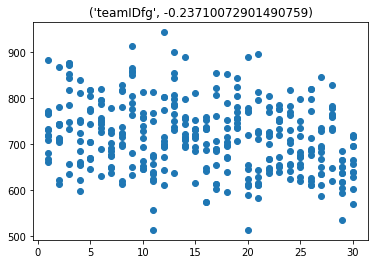

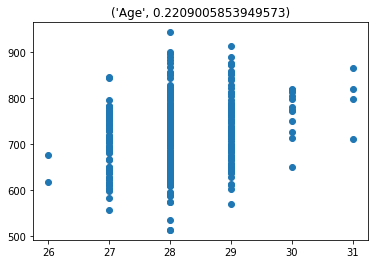

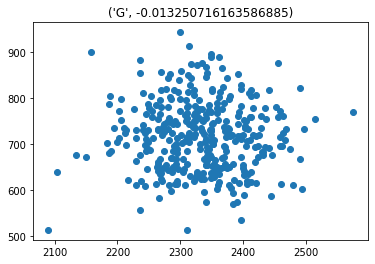

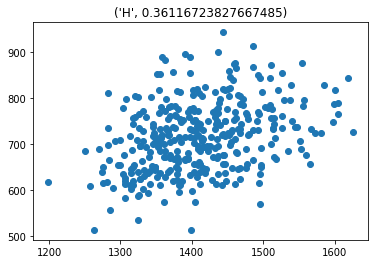

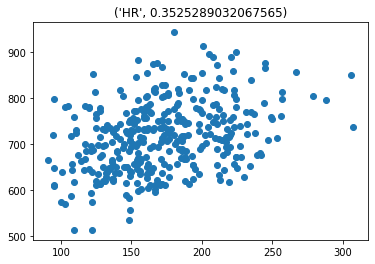

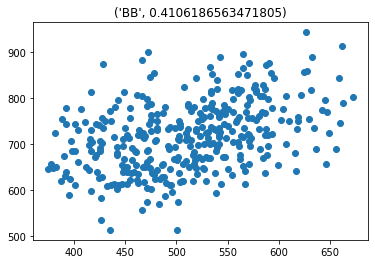

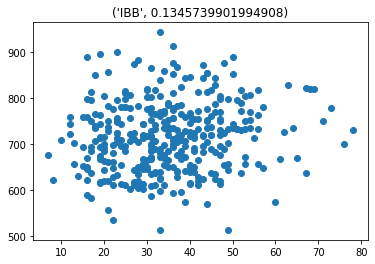

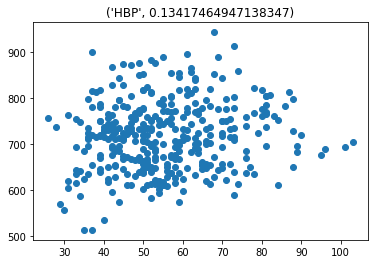

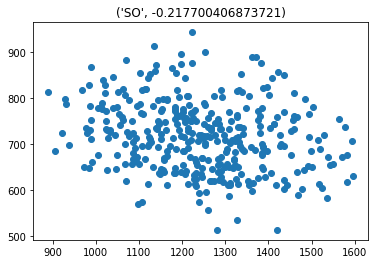

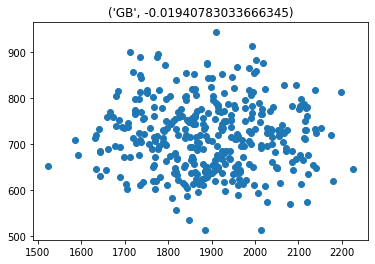

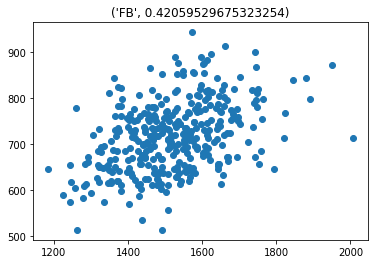

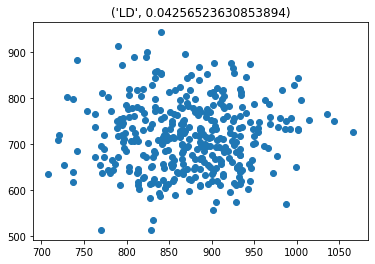

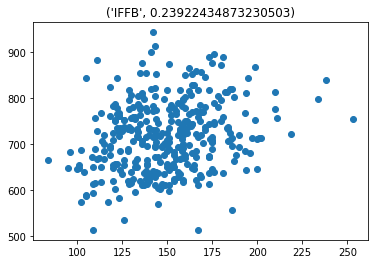

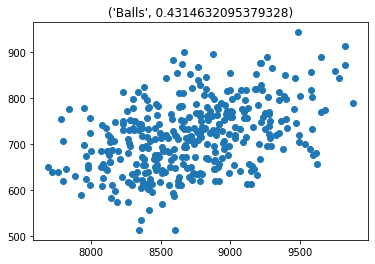

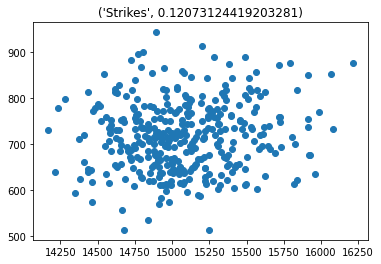

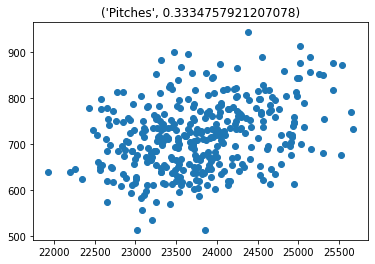

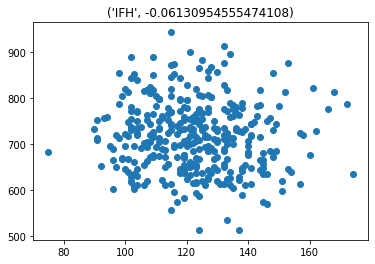

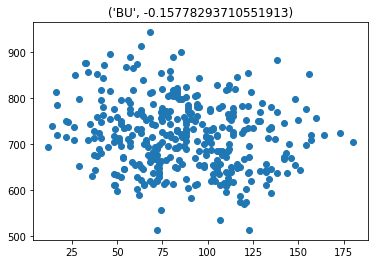

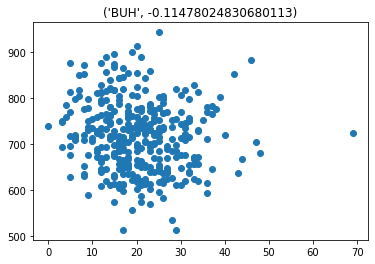

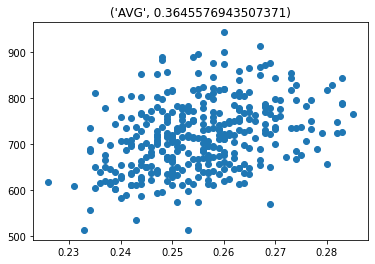

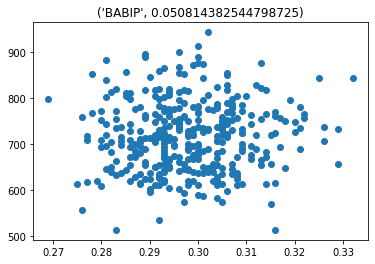

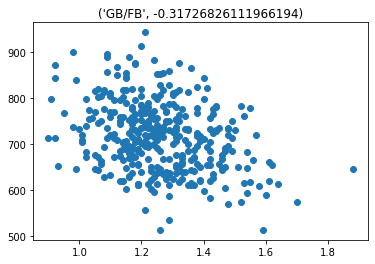

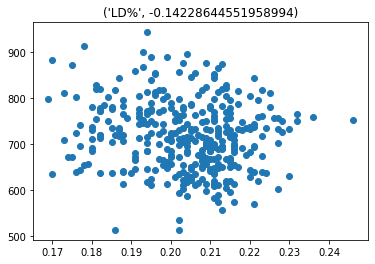

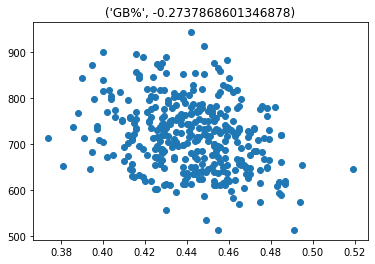

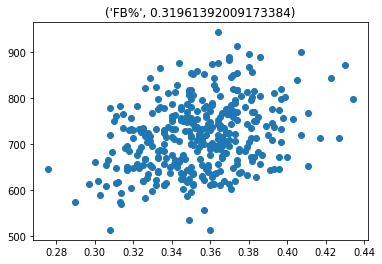

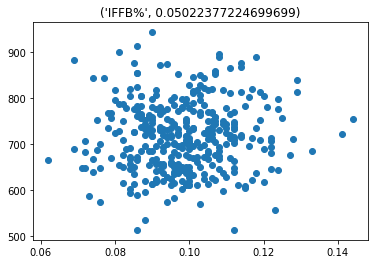

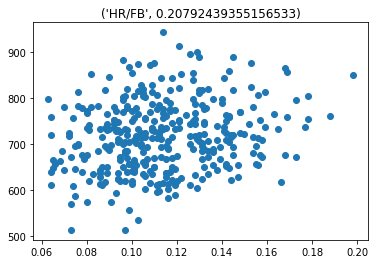

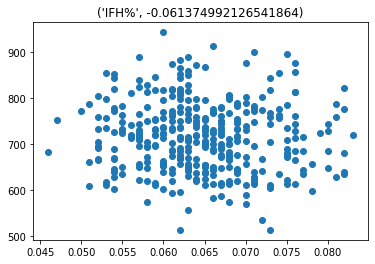

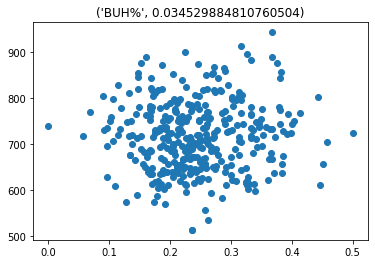

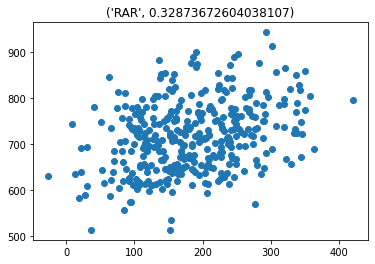

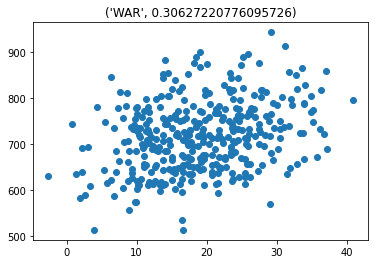

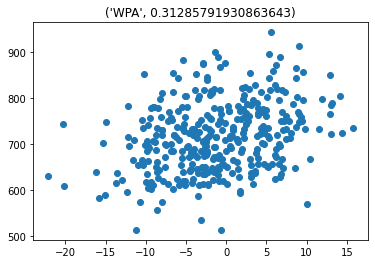

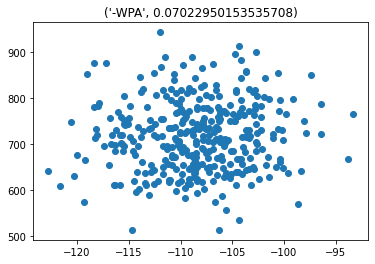

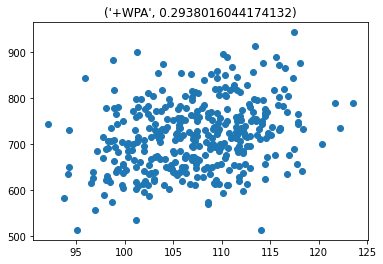

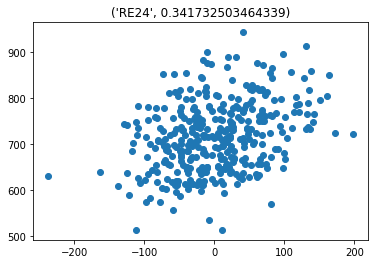

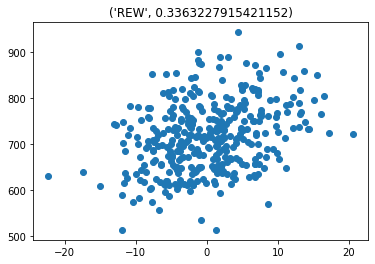

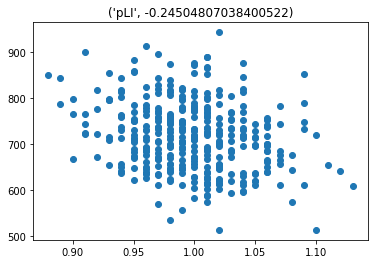

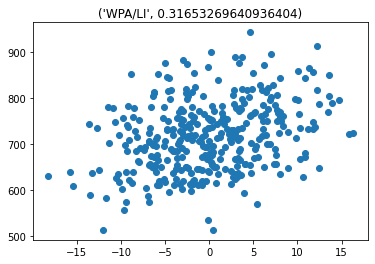

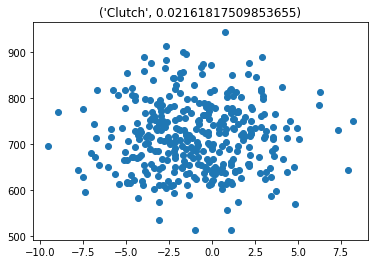

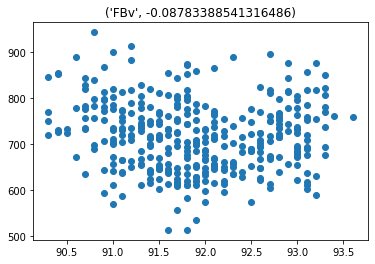

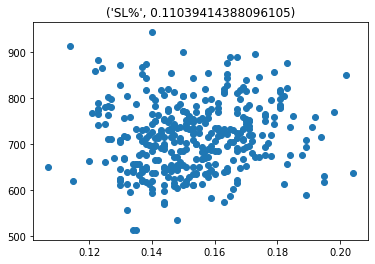

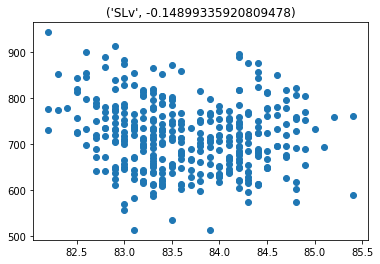

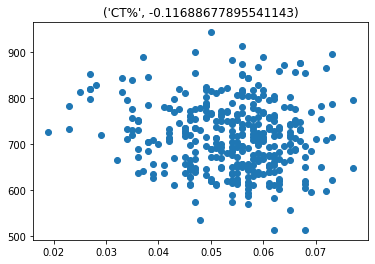

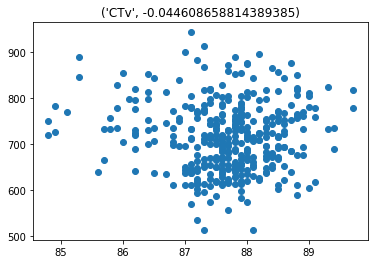

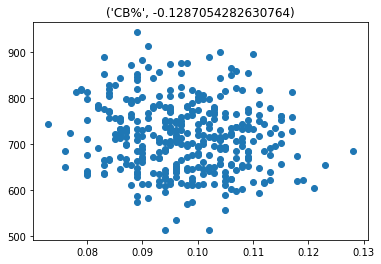

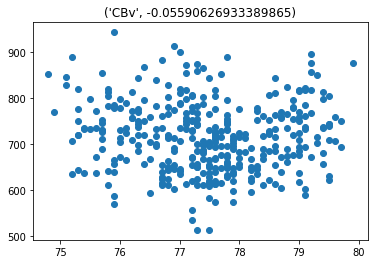

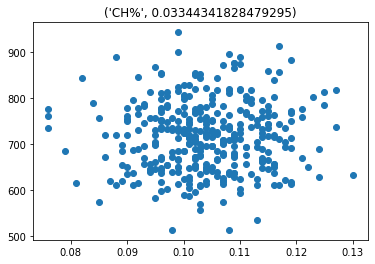

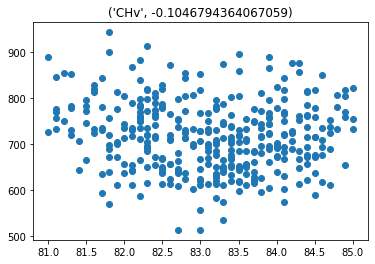

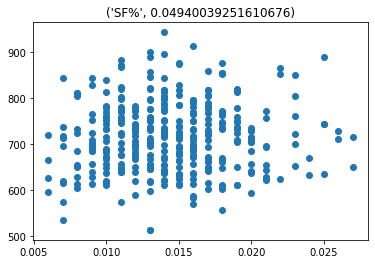

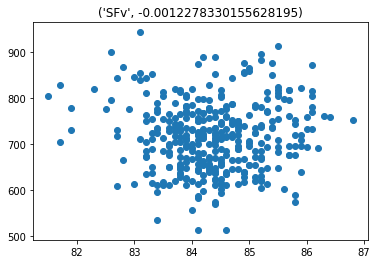

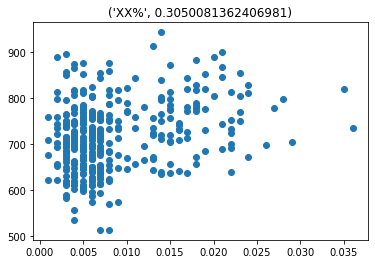

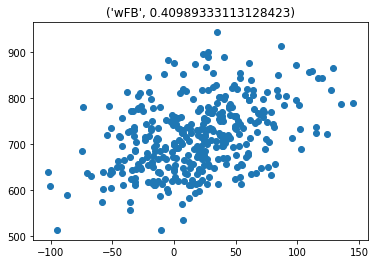

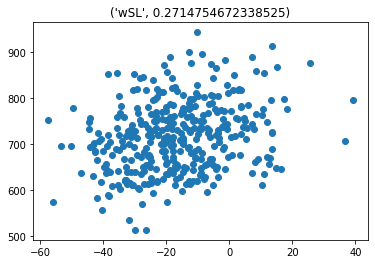

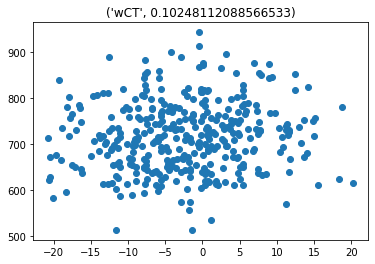

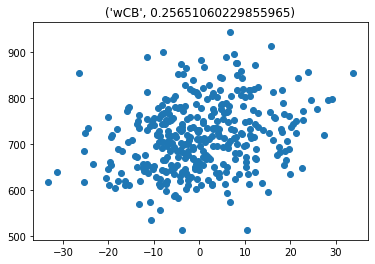

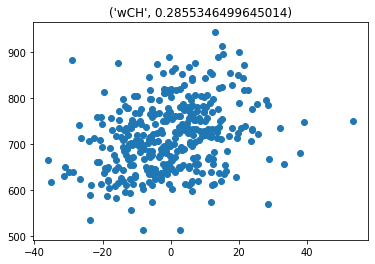

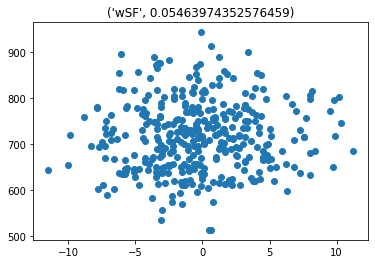

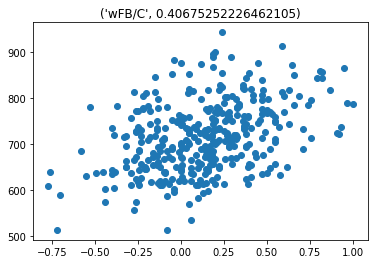

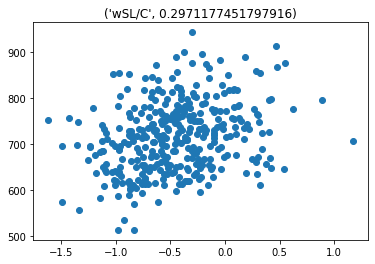

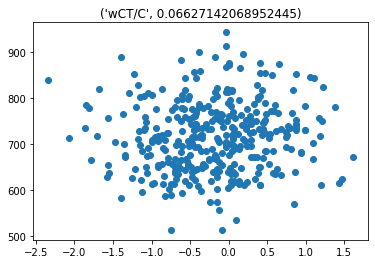

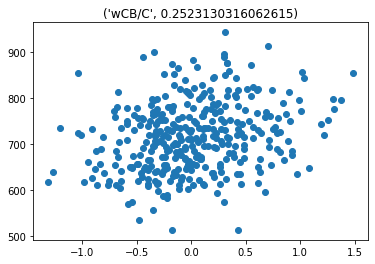

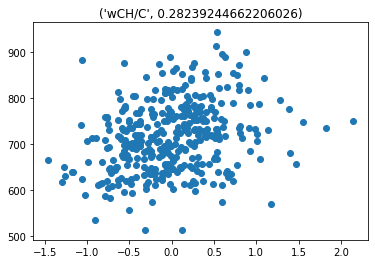

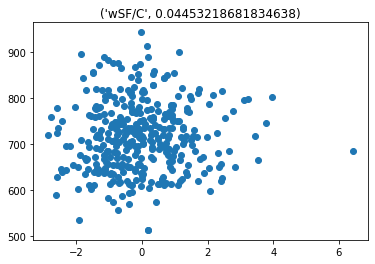

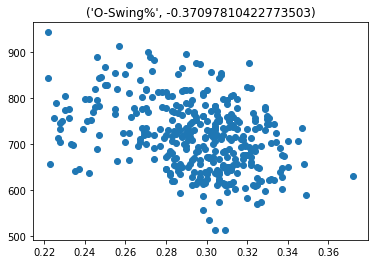

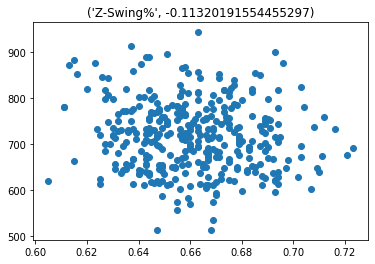

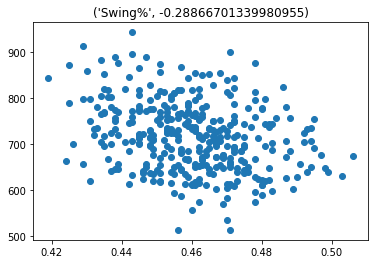

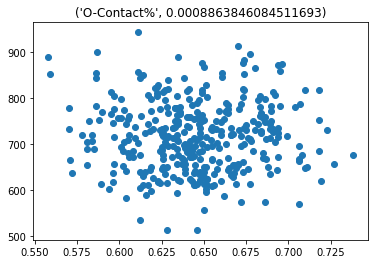

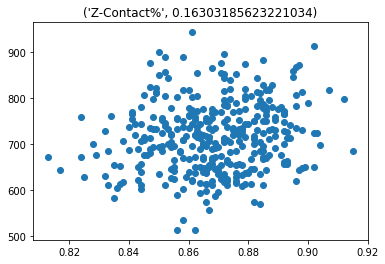

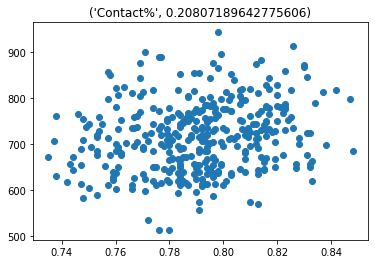

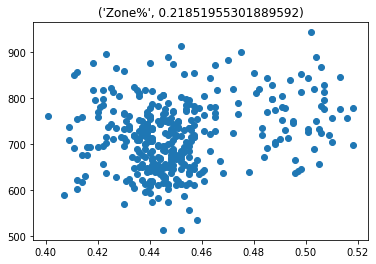

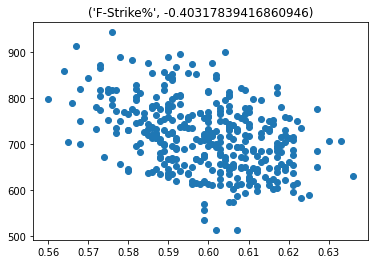

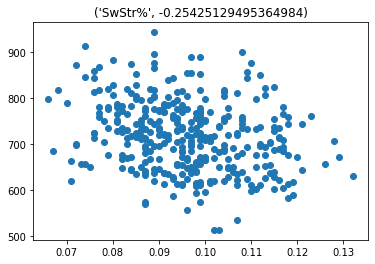

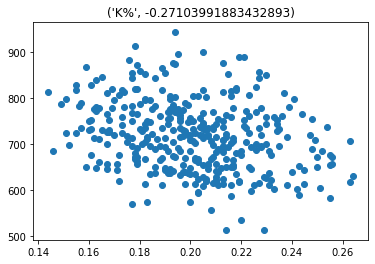

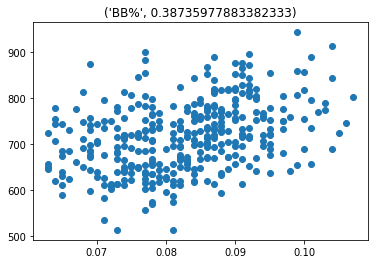

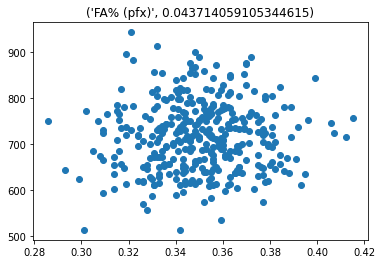

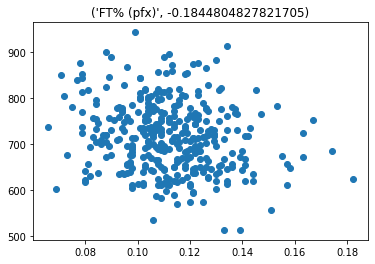

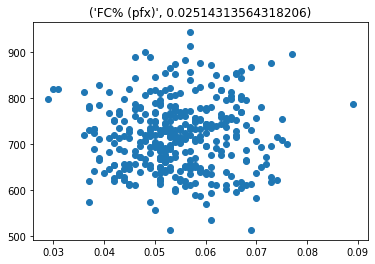

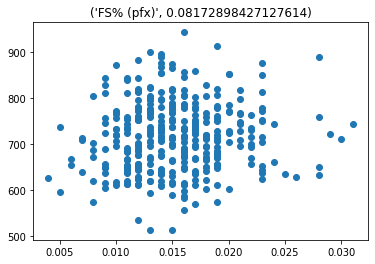

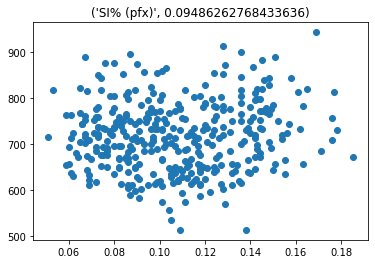

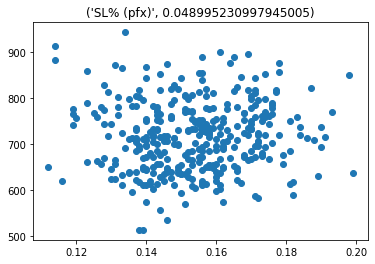

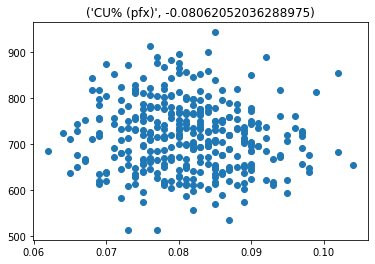

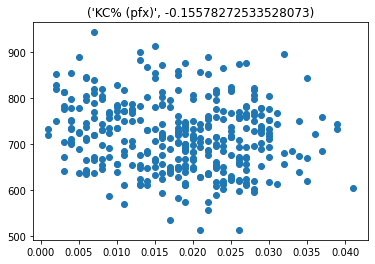

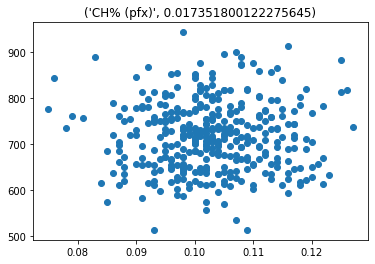

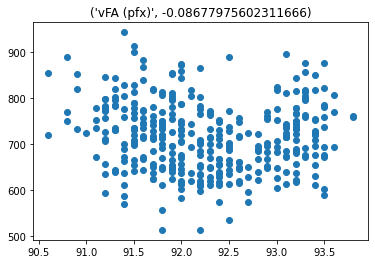

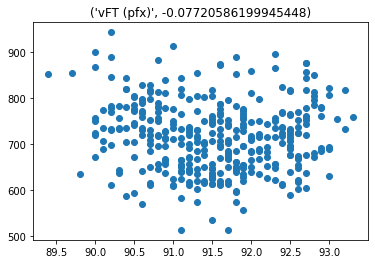

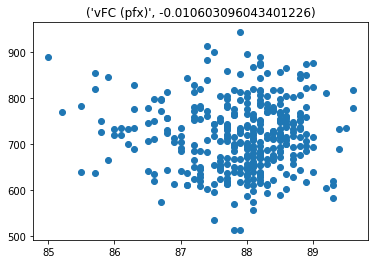

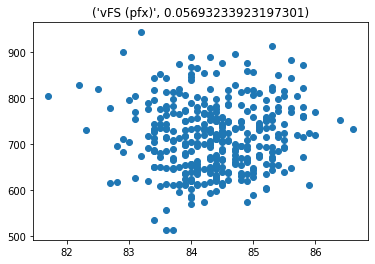

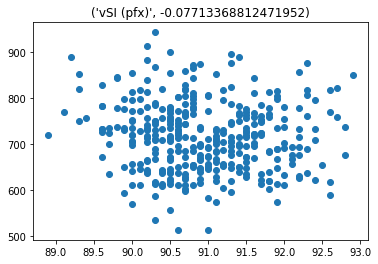

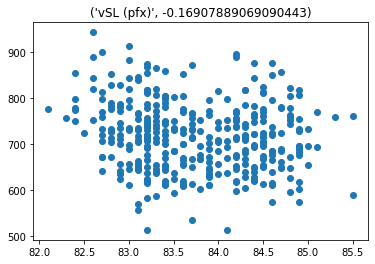

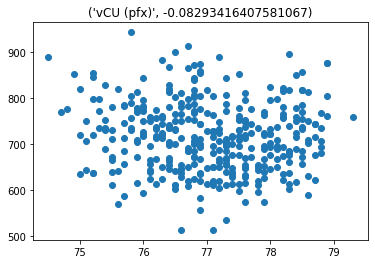

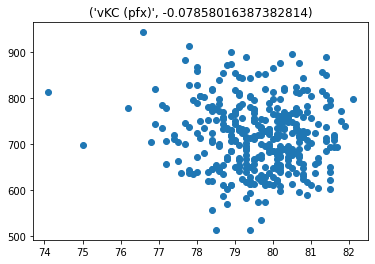

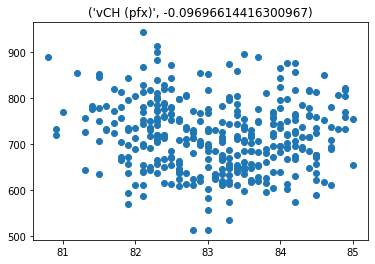

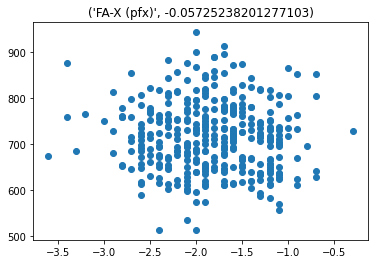

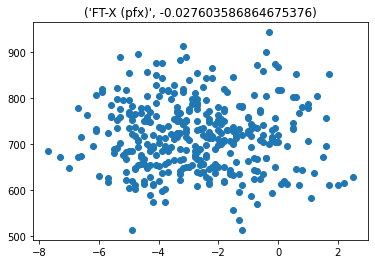

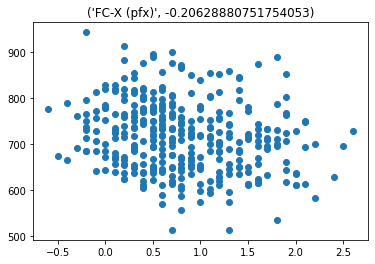

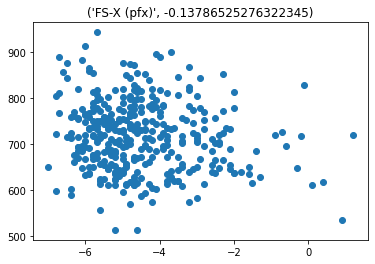

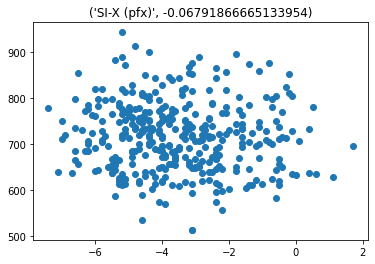

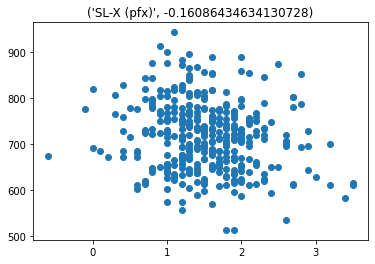

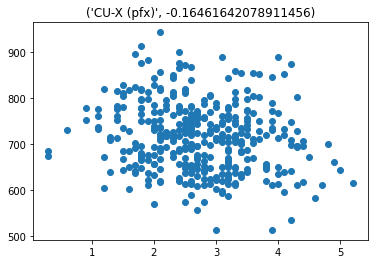

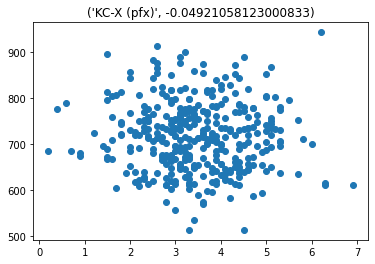

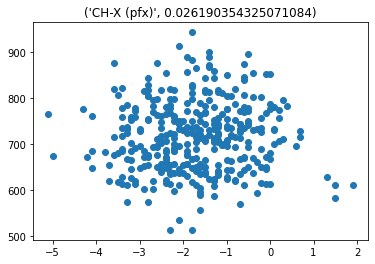

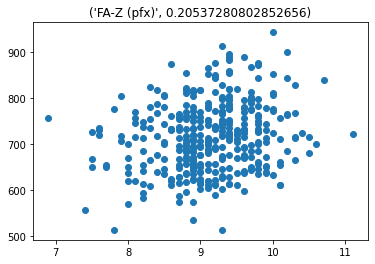

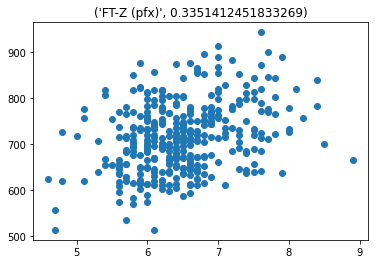

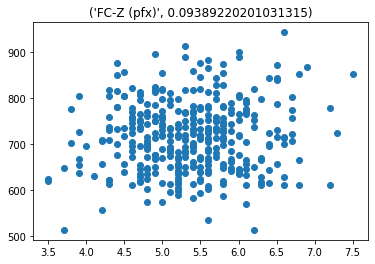

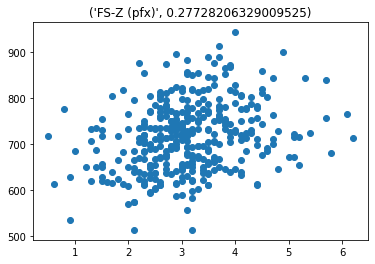

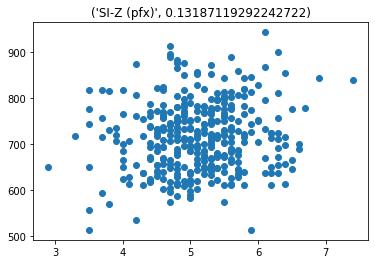

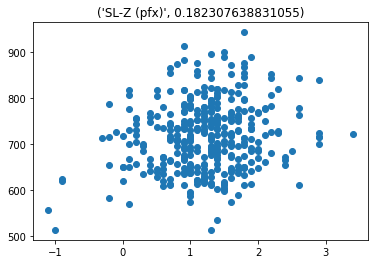

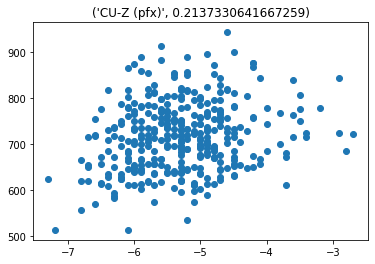

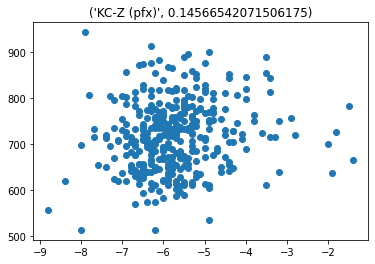

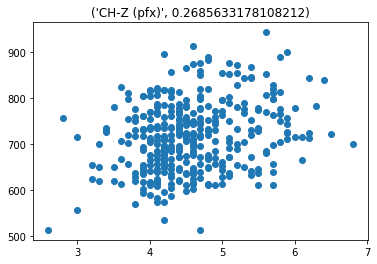

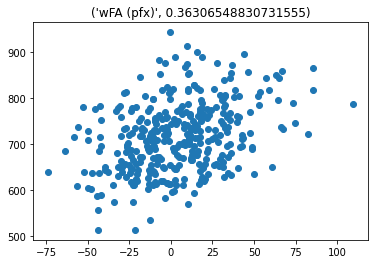

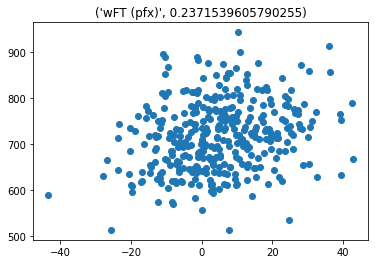

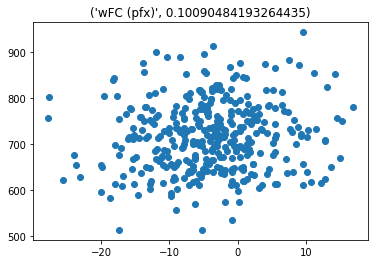

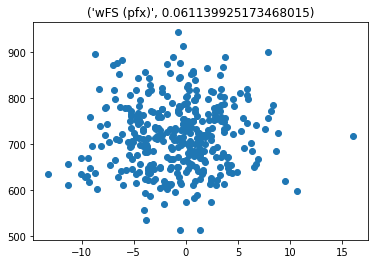

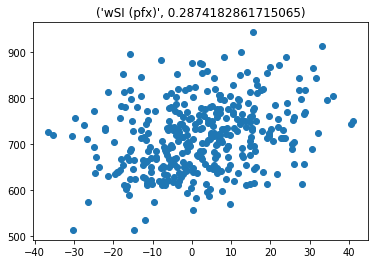

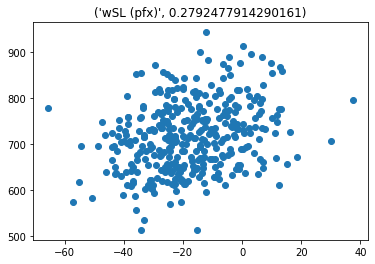

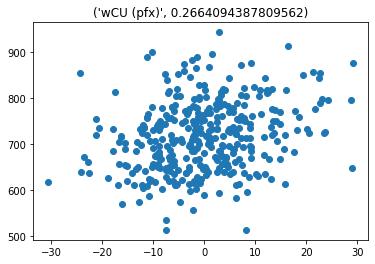

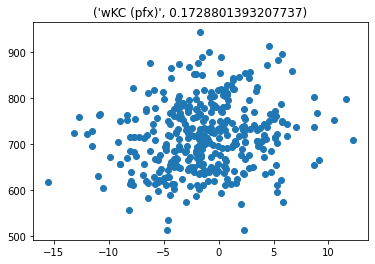

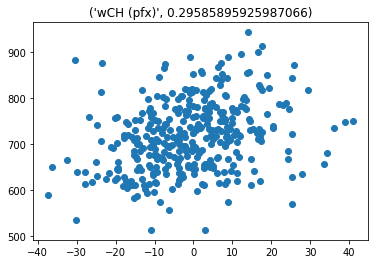

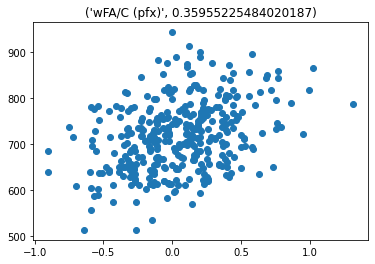

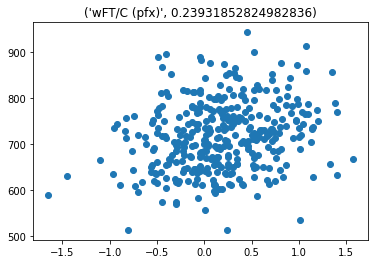

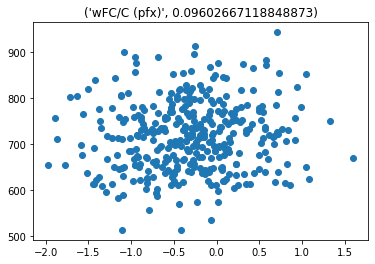

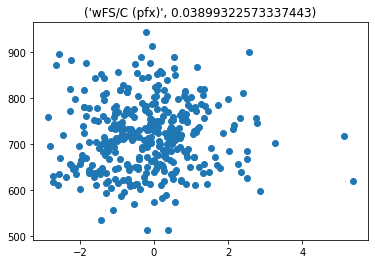

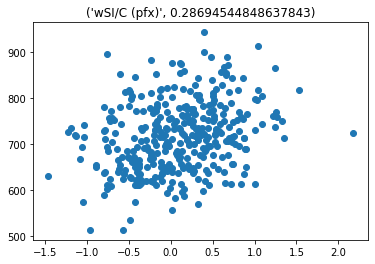

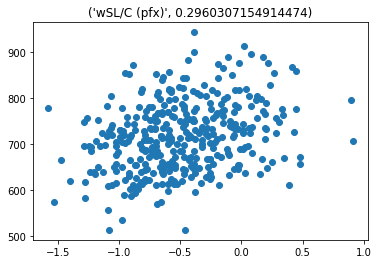

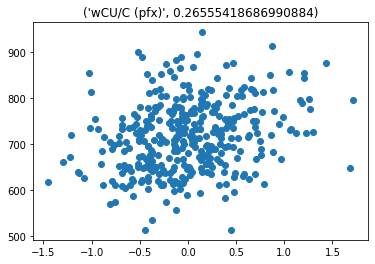

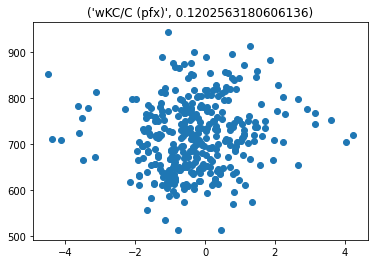

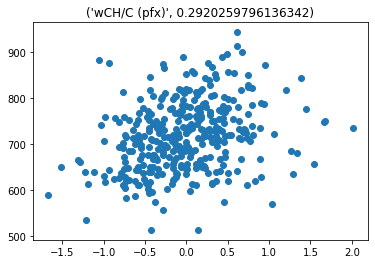

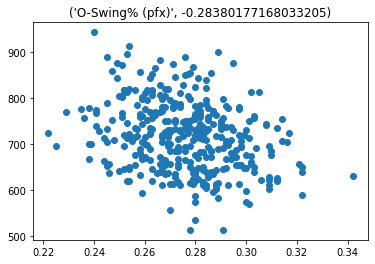

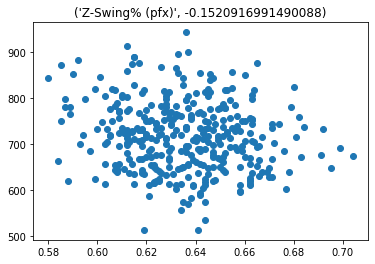

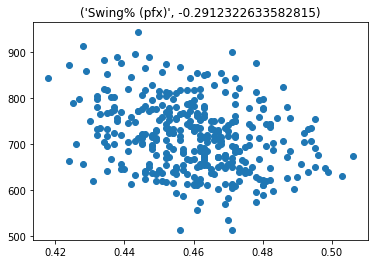

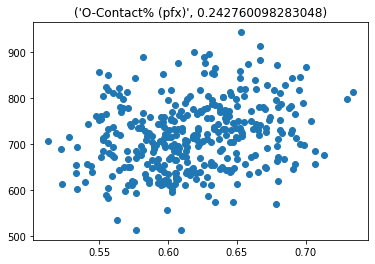

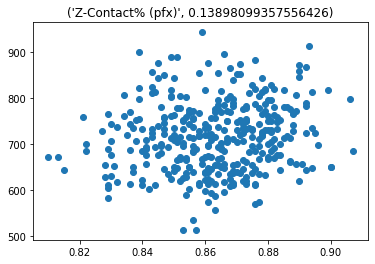

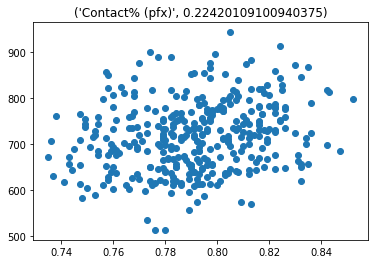

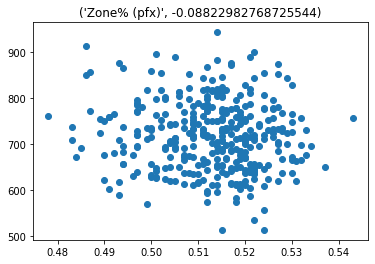

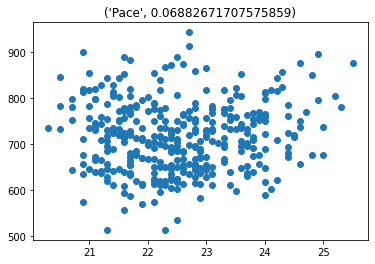

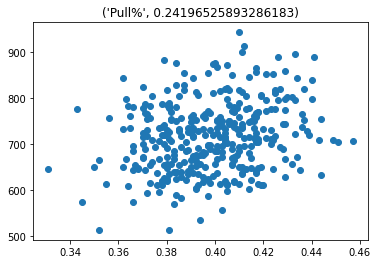

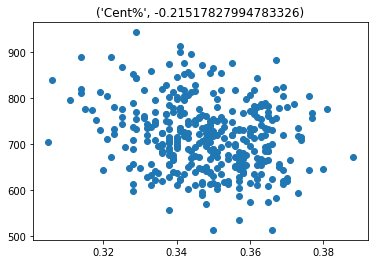

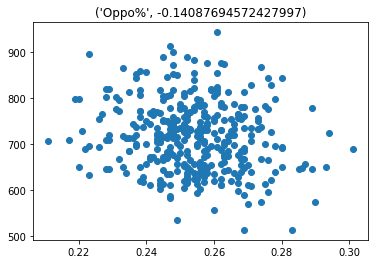

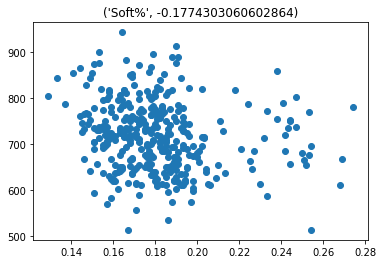

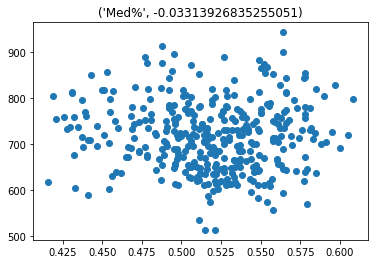

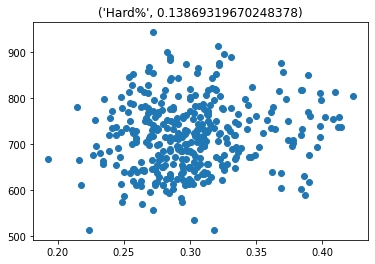

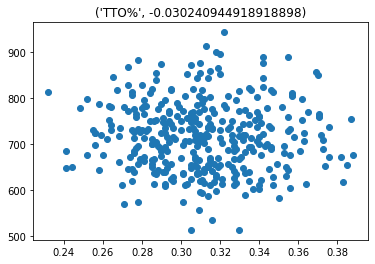

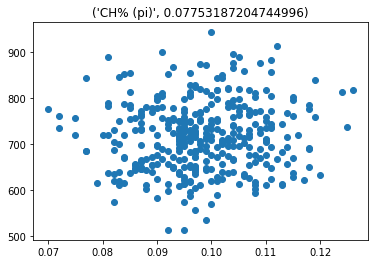

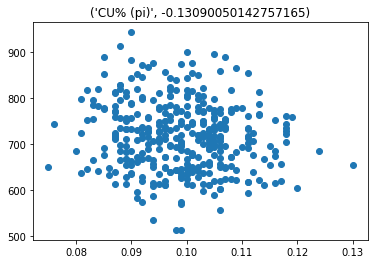

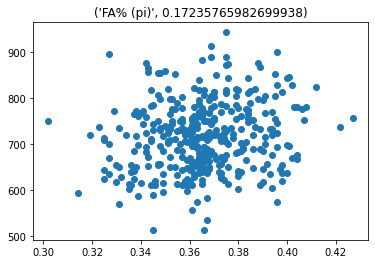

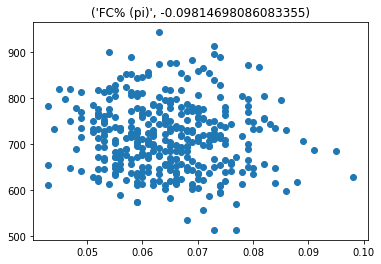

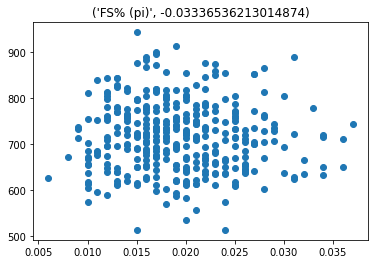

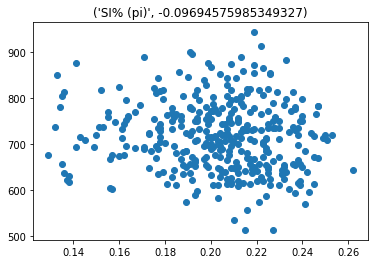

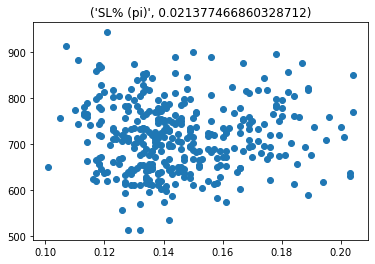

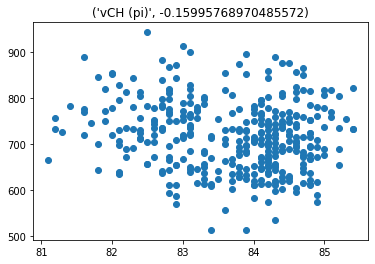

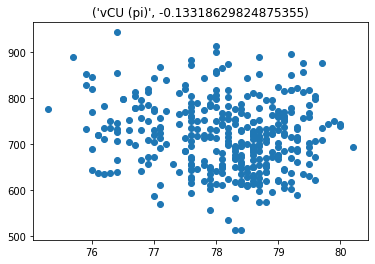

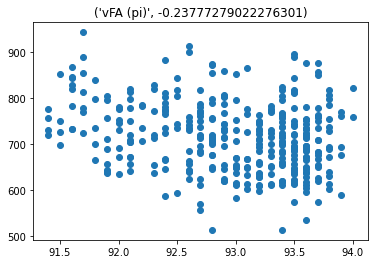

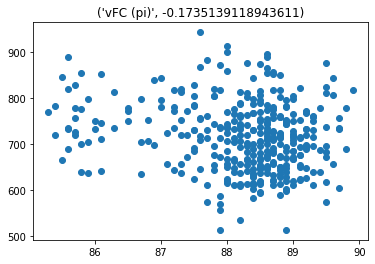

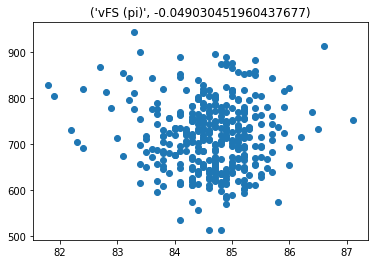

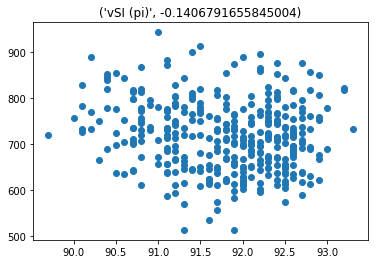

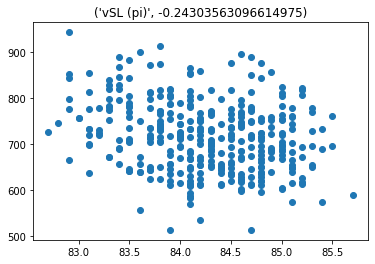

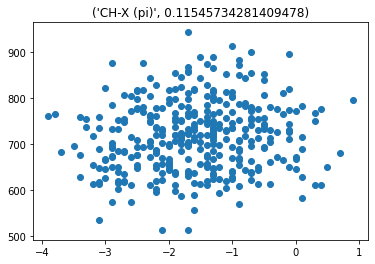

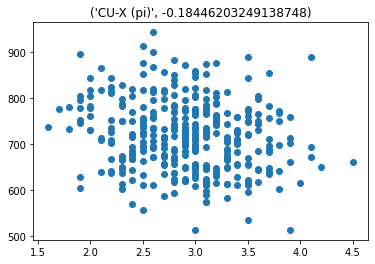

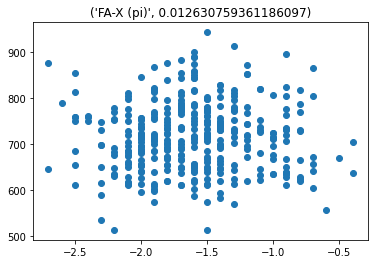

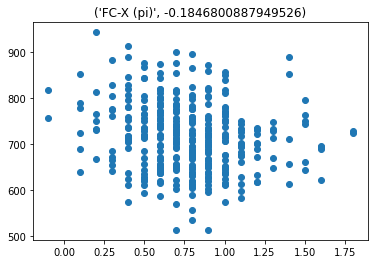

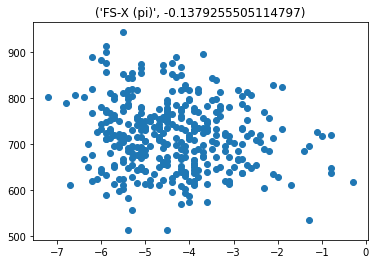

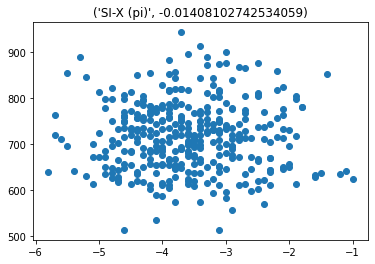

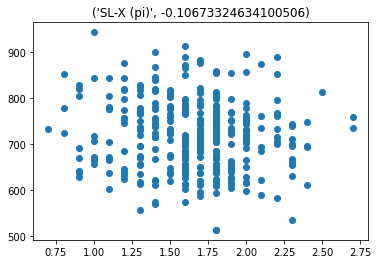

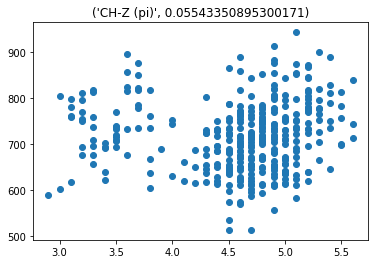

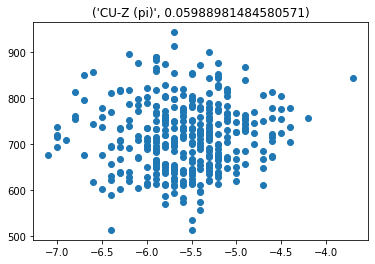

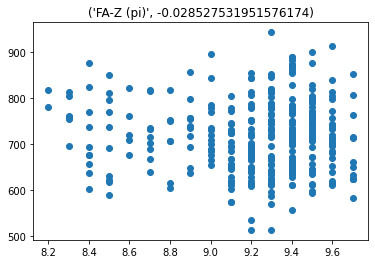

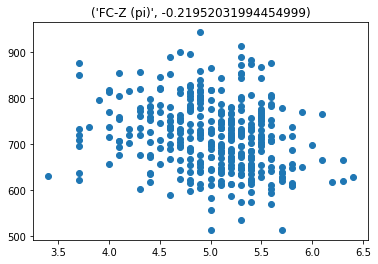

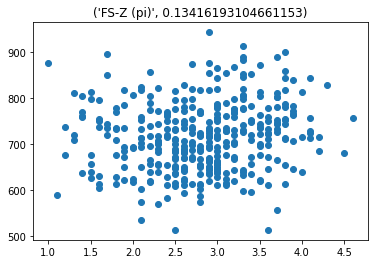

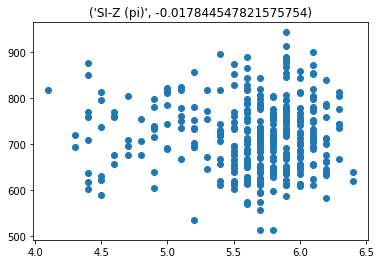

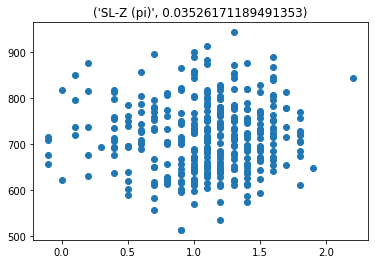

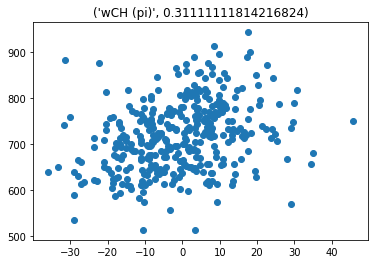

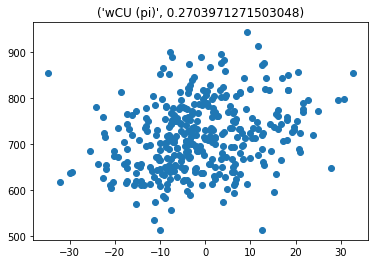

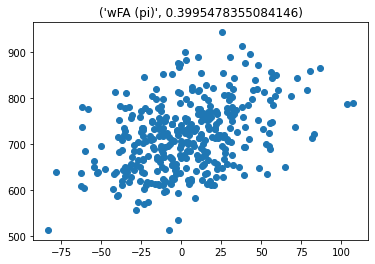

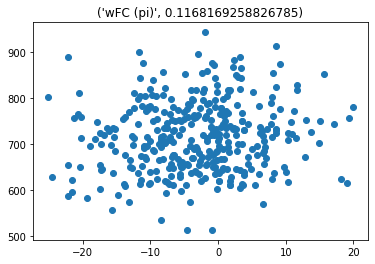

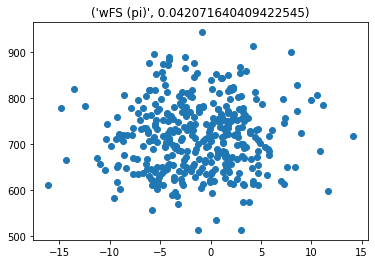

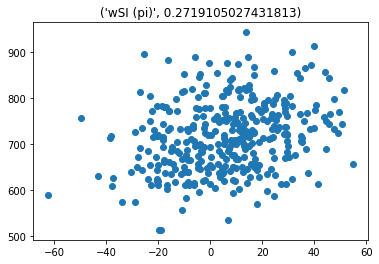

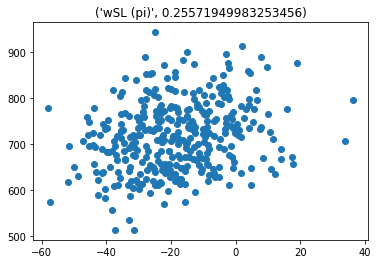

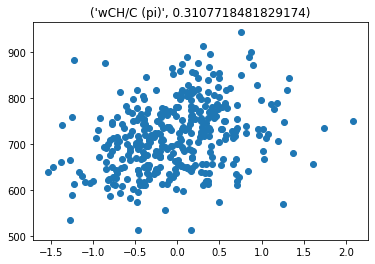

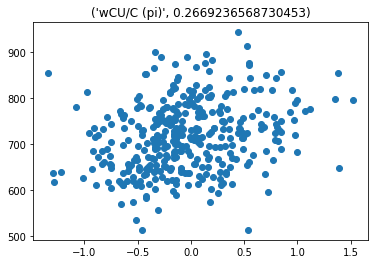

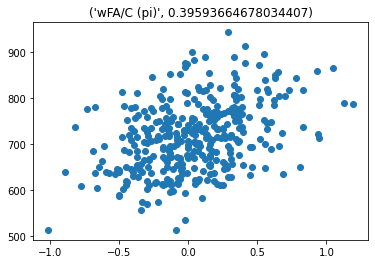

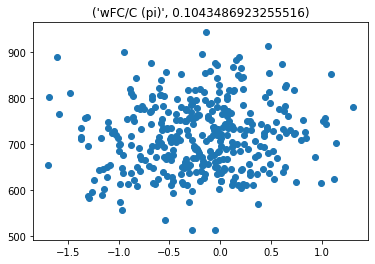

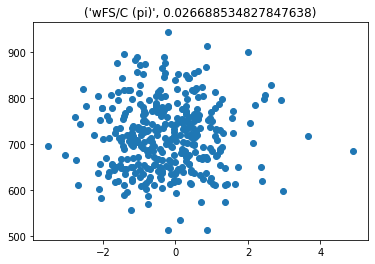

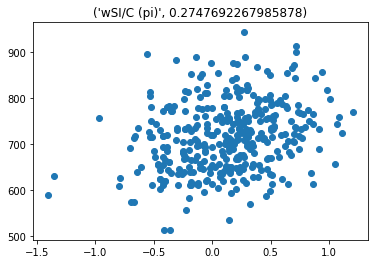

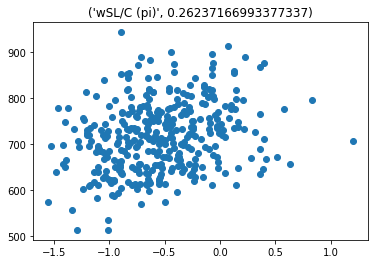

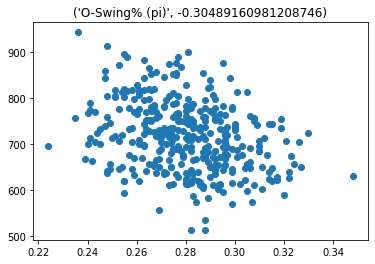

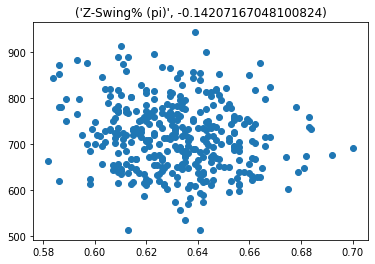

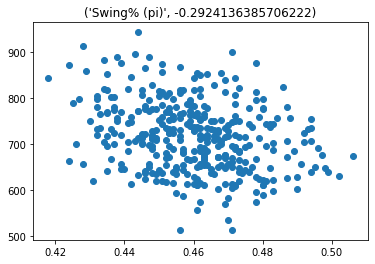

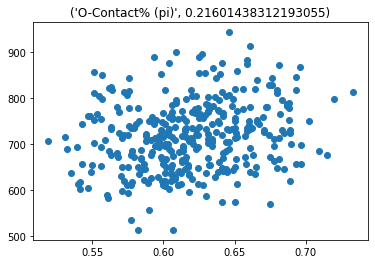

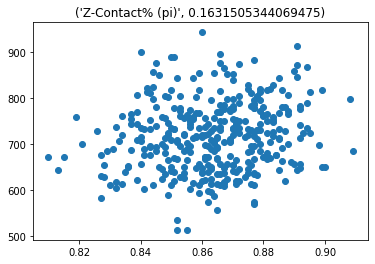

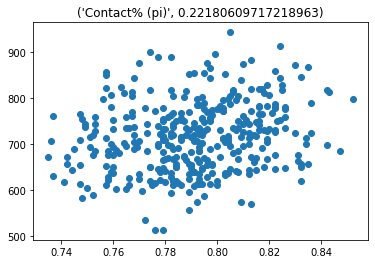

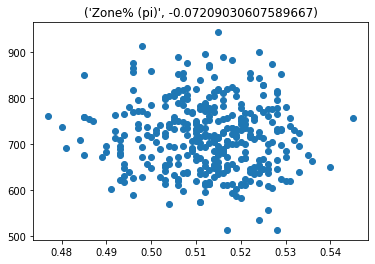

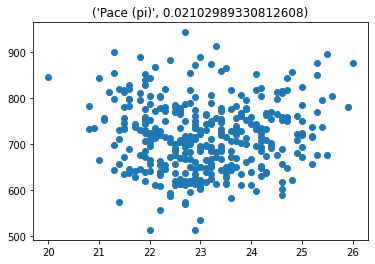

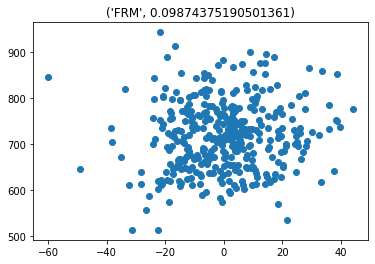

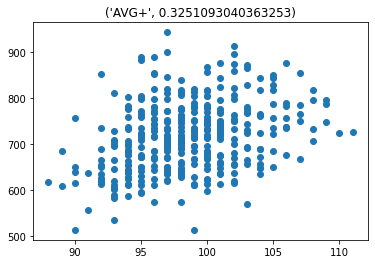

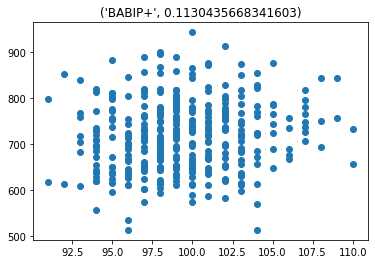

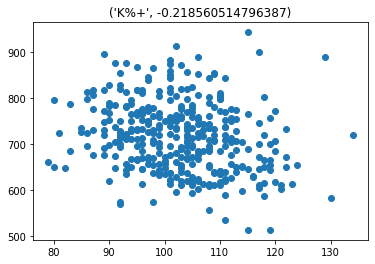

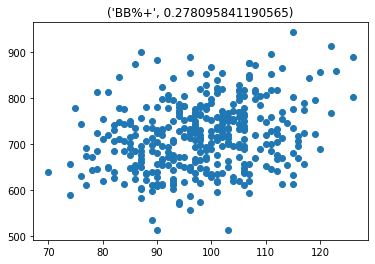

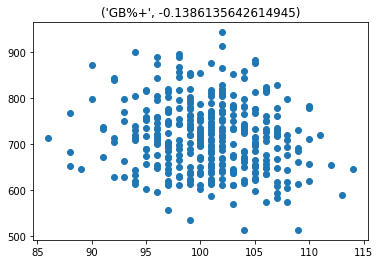

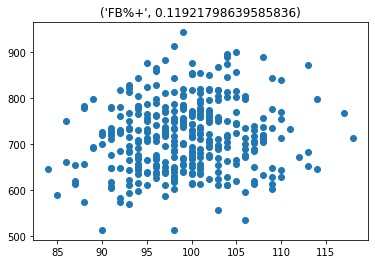

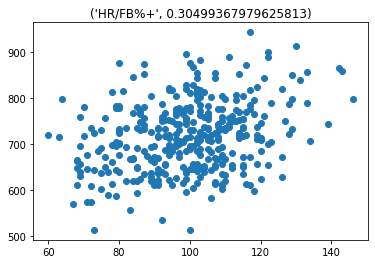

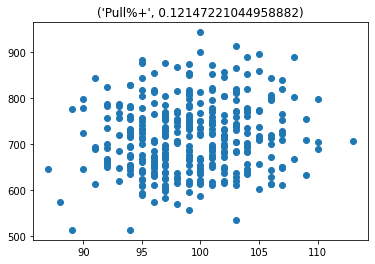

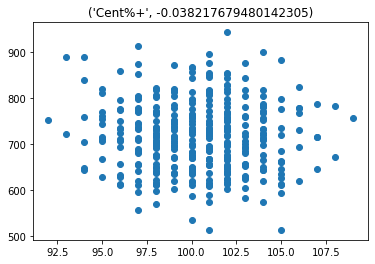

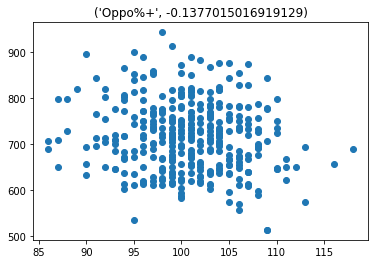

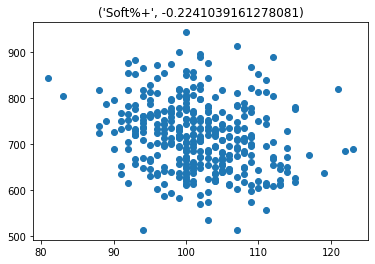

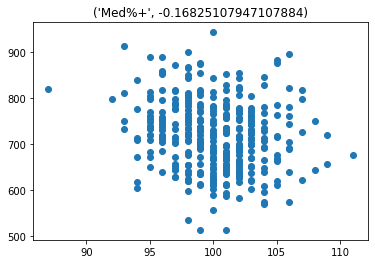

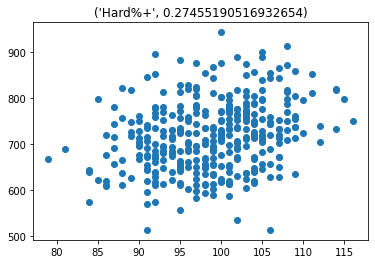

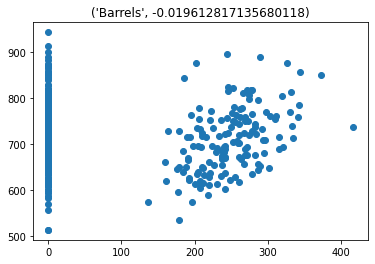

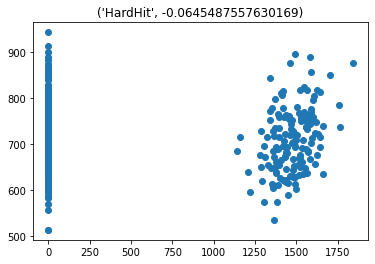

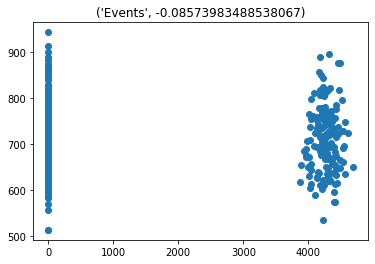

        0         1          2         3         4         5         6    \
0  teamIDfg       Age          G         H        HR        BB       IBB   
1 -0.237101  0.220901 -0.0132507  0.361167  0.352529  0.410619  0.134574   

        7       8          9    ...       200       201        202       203  \
0       HBP      SO         GB  ...   HR/FB%+    Pull%+     Cent%+    Oppo%+   
1  0.134175 -0.2177 -0.0194078  ...  0.304994  0.121472 -0.0382177 -0.137702   

        204       205       206        207        208        209  
0    Soft%+     Med%+    Hard%+    Barrels    HardHit     Events  
1 -0.224104 -0.168251  0.274552 -0.0196128 -0.0645488 -0.0857398  

[2 rows x 210 columns]


In [13]:
corrs = []
names = []
for col in hitting:
    try:
        #calculate correlation coefficient of variable
        title = (col,stats.pearsonr(pitching[col], pitching['R_next'])[0])
        
        #writing to lists
        corrs.append(stats.pearsonr(pitching[col], pitching['R_next'])[0])
        names.append(col)
        
        #scatter plot
        plt.figure()
        plt.scatter(x=pitching[col]
                    , y=pitching['R_next'])
        plt.title(title)
        plt.show()
    except:
        continue
        
print(pd.DataFrame([names,corrs]))

In [18]:
corr_df = pd.DataFrame([names,corrs]).T
corr_df.columns = ['var','r']
corr_df['abs_r'] = abs(corr_df['r'])
corr_df = corr_df.sort_values('abs_r', ascending=False)

corr_df.head(40)

var         r     abs_r
13           Balls  0.431463  0.431463
10              FB  0.420595  0.420595
5               BB  0.410619  0.410619
51             wFB  0.409893  0.409893
57           wFB/C  0.406753  0.406753
70       F-Strike% -0.403178  0.403178
173       wFA (pi)  0.399548  0.399548
180     wFA/C (pi)  0.395937  0.395937
73             BB%   0.38736   0.38736
63        O-Swing% -0.370978  0.370978
19             AVG  0.364558  0.364558
110      wFA (pfx)  0.363065  0.363065
3                H  0.361167  0.361167
119    wFA/C (pfx)  0.359552  0.359552
4               HR  0.352529  0.352529
34            RE24  0.341733  0.341733
35             REW  0.336323  0.336323
102     FT-Z (pfx)  0.335141  0.335141
15         Pitches  0.333476  0.333476
29             RAR  0.328737  0.328737
194           AVG+  0.325109  0.325109
24             FB%  0.319614  0.319614
21           GB/FB -0.317268  0.317268
37          WPA/LI  0.316533  0.316533
31             WPA  0.312858  0.312858
171       wCH (pi)  0.311111  0.311111
178     wCH/C (pi)  0.310772  0.310772
30             WAR  0.306272  0.306272
50             XX%  0.305008  0.305008
200        HR/FB%+  0.304994  0.304994
185  O-Swing% (pi) -0.304892  0.304892
58           wSL/C  0.297118  0.297118
124    wSL/C (pfx)  0.296031  0.296031
118      wCH (pfx)  0.295859  0.295859
33            +WPA  0.293802  0.293802
187    Swing% (pi) -0.292414  0.292414
127    wCH/C (pfx)  0.292026  0.292026
130   Swing% (pfx) -0.291232  0.291232
65          Swing% -0.288667  0.288667
114      wSI (pfx)  0.287418  0.287418

In [22]:
pitching_corr_vars_only = pitching.copy()

incl = [
    'R_next',
    'R_current',
        'Balls',
        'FB',
        'BB',
        'wFB',
        'wFB/C',
        'F-Strike%',
        'wFA (pi)',
        'wFA/C (pi)',
        'BB%',
        'O-Swing%',
        'AVG',
        'wFA (pfx)',
        'H',
        'wFA/C (pfx)',
        'HR',
        'RE24',
        'REW',
        'FT-Z (pfx)',
        'RAR',
        'AVG+',
        'FB%',
        'GB/FB',
        'WPA/LI',
        'WPA',
        'wCH (pi)',
        'wCH/C (pi)',
        'WAR',
        'XX%',
        'HR/FB%+',
        'O-Swing% (pi)',
        'wSL/C',
        'wCH (pfx)',
        '+WPA',
        'Swing% (pi)',
        'wCH/C (pfx)',
        'Swing%',
        'wSI (pfx)',
        ]

for col in pitching_corr_vars_only:
    if col not in incl:
        del pitching_corr_vars_only[col]

pitching_corr_vars_only.head()

H  R_current   HR   BB    FB  Balls    AVG  GB/FB    FB%    RAR  ...  \
0  1619        901  194  595  1640   9465  0.283   1.15  0.362  235.8  ...   
1  1565        845  173  646  1754   9626  0.280   1.07  0.386  329.9  ...   
2  1552        855  184  636  1586   9378  0.278   1.19  0.360  301.5  ...   
3  1529        821  200  572  1744   9105  0.271   1.13  0.381  168.4  ...   
4  1585        779  174  577  1597   8780  0.281   1.29  0.343  340.8  ...   

   wCH/C (pfx)  wCH (pi)  wFA (pi)  wCH/C (pi)  wFA/C (pi)  O-Swing% (pi)  \
0         0.36      12.0      57.0        0.50        0.63          0.263   
1         1.54      34.5      28.4        1.61        0.32          0.249   
2         0.03       3.0      55.4        0.14        0.60          0.276   
3         0.56      20.8      16.5        0.99        0.18          0.272   
4         0.74      20.2      29.7        0.94        0.33          0.280   

   Swing% (pi)  AVG+  HR/FB%+  R_next  
0        0.460   105      121     844  
1        0.428   104      101     657  
2        0.448   104      108     690  
3        0.459   101      118     797  
4        0.466   105      101     829  

[5 rows x 39 columns]

<AxesSubplot:>

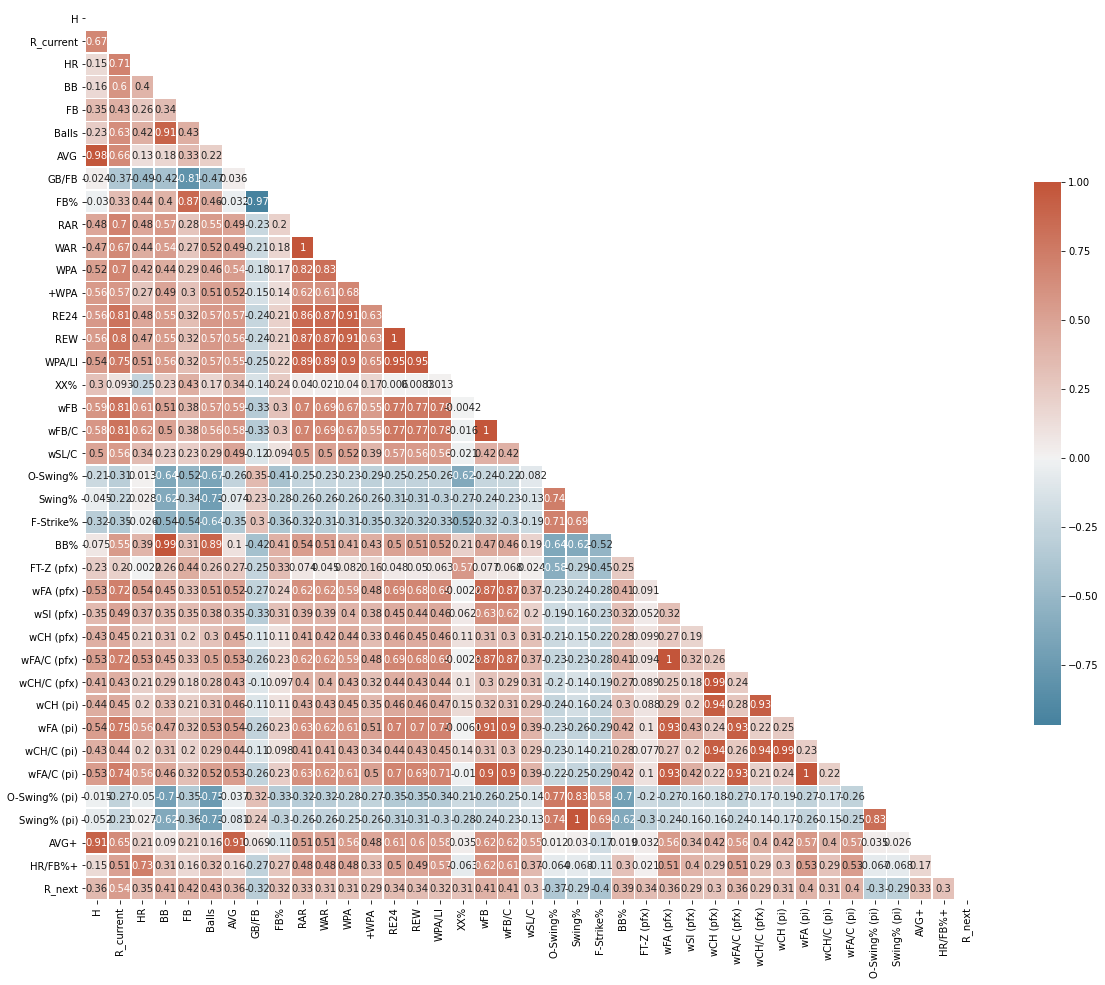

In [23]:
corr = pitching_corr_vars_only.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

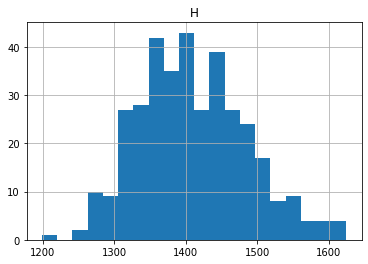

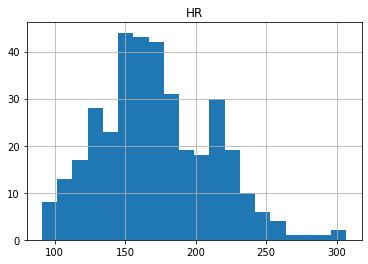

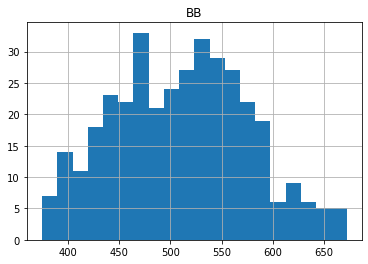

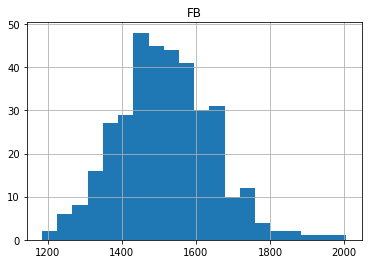

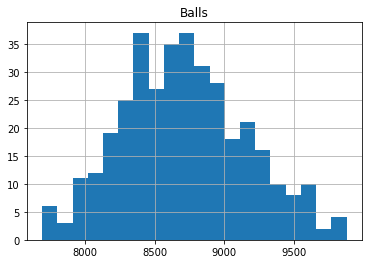

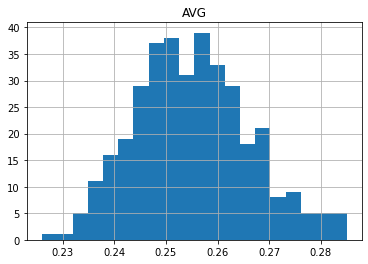

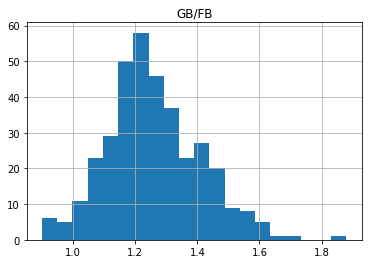

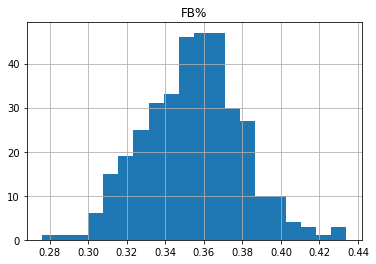

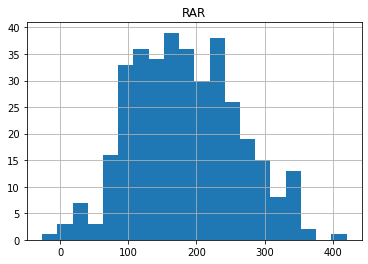

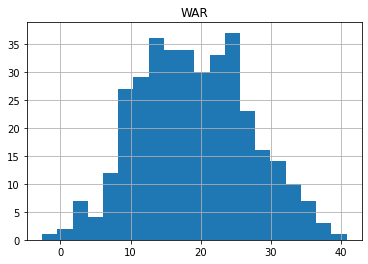

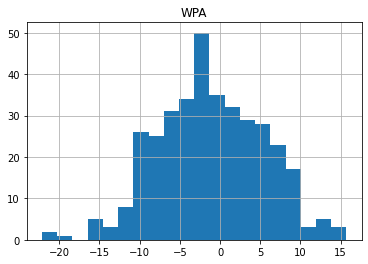

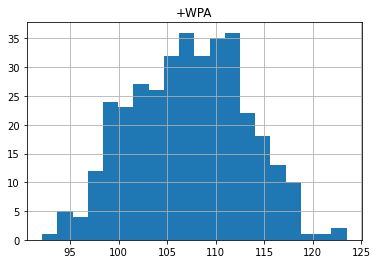

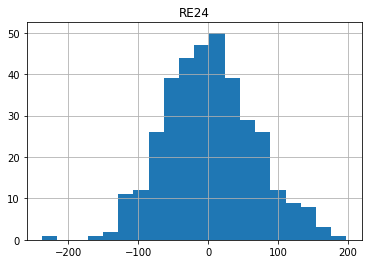

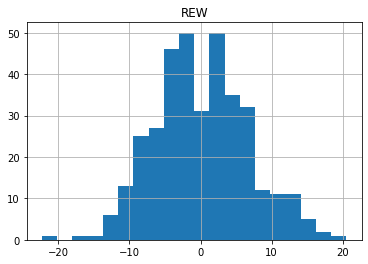

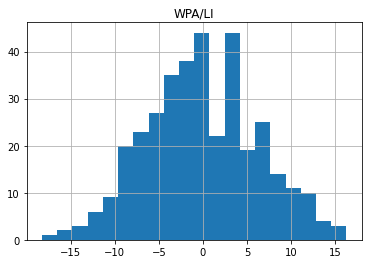

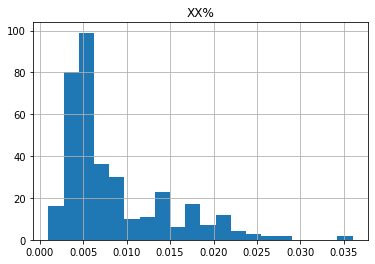

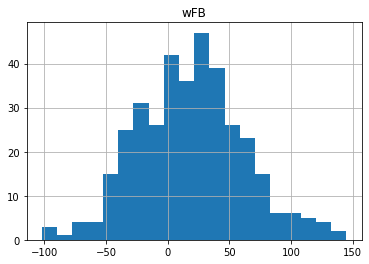

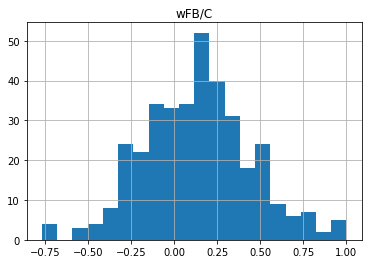

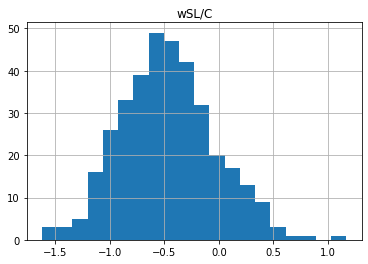

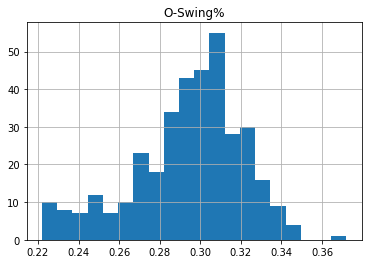

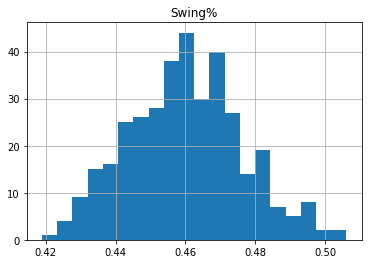

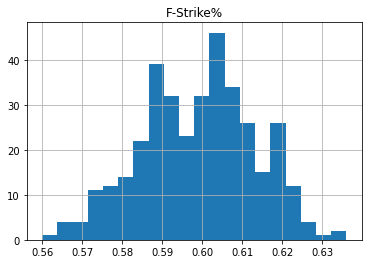

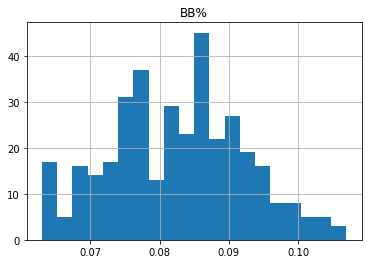

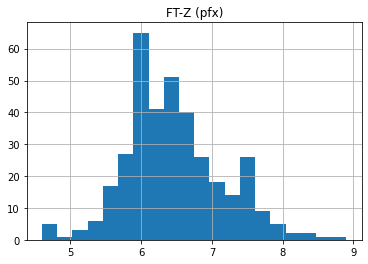

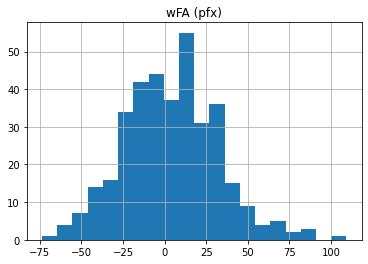

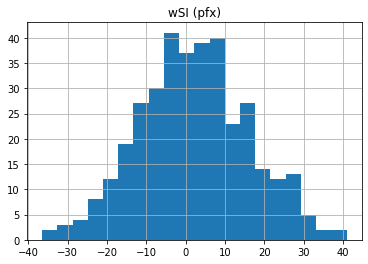

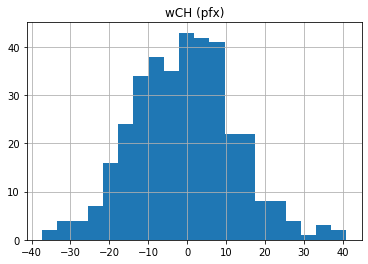

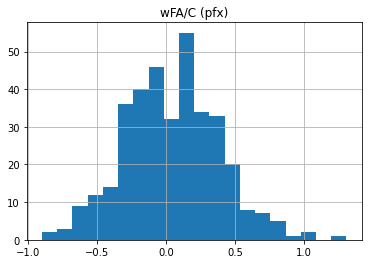

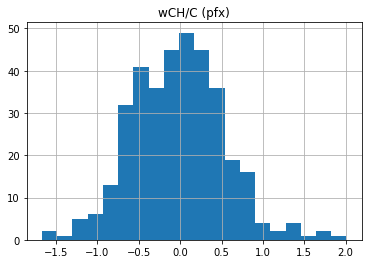

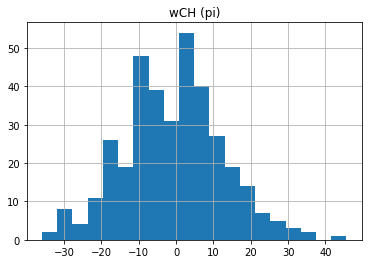

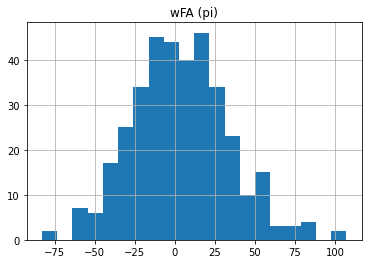

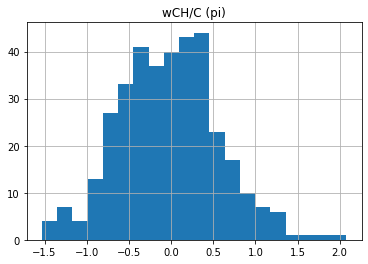

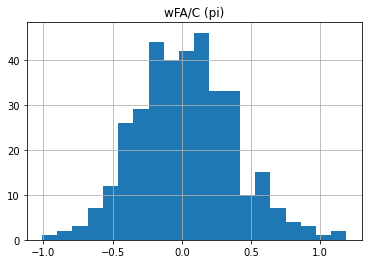

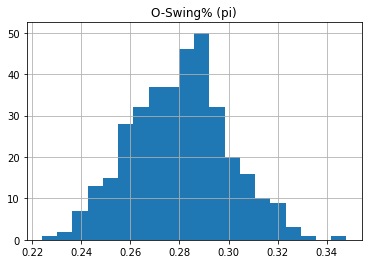

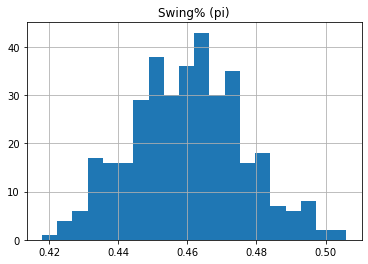

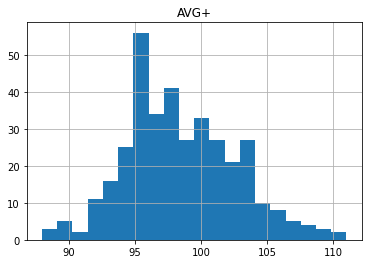

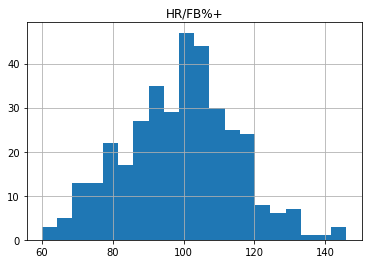

In [21]:
for col in pitching_corr_vars_only:
    try:
        #scatter plot
        plt.figure()
        pitching_corr_vars_only[col].hist(bins=20)
        plt.title(col)
        plt.show()
    except:
        continue

In [44]:
pitching['GB_FB_RATIO'] = pitching['GB/FB']
pitching['O_SWING_PERC'] = pitching['O-Swing%']
pitching['BB_PERC'] = pitching['BB%']

                            OLS Regression Results                            
Dep. Variable:                 R_next   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.34
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.83e-22
Time:                        21:08:03   Log-Likelihood:                -2014.9
No. Observations:                 360   AIC:                             4038.
Df Residuals:                     356   BIC:                             4053.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     393.8371     96.273      4.091      

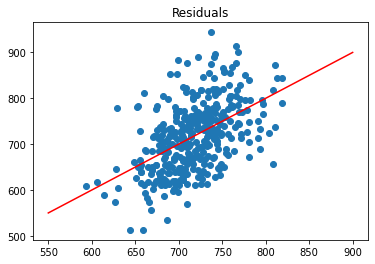

In [47]:
mod = smf.ols(
    """
        R_next ~  GB_FB_RATIO 
                + wFB 
    """,
    data=pitching,
).fit()

print(mod.summary())

pitching['pred'] = mod.predict(pitching)

print('MPE=',np.mean((pitching['pred'] - pitching['R_next']) / pitching['R_next']))
print('MAPE=',np.mean(abs(pitching['pred'] - pitching['R_next']) / pitching['R_next']))

plt.figure()
plt.scatter(x=pitching['pred']
            , y=pitching['R_next'])
plt.plot([550,900],[550,900], color='red')
plt.title('Residuals')
plt.show()

2009
MPE= 0.03947208387262805
MAPE= 0.07128114588337202
2010
MPE= 0.021655366880475268
MAPE= 0.06710759305769179
2011
MPE= 0.026348948158555825
MAPE= 0.06878452718031025


/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launche

2012
MPE= 0.029013468200225323
MAPE= 0.0712387309350899
2013
MPE= 0.023939611933717117
MAPE= 0.07016126608667675
2014
MPE= 0.024791147419806144
MAPE= 0.07270494147479273
2015
MPE= 0.028765550740946076
MAPE= 0.07457252620017059
2016
MPE= 0.028036437714497587
MAPE= 0.07307640046528005
2017
MPE= 0.023238710165573273
MAPE= 0.07253364588571737
2018
MPE= 0.013715665941705868
MAPE= 0.07313106576765921
2019
MPE= 0.011813873809997932
MAPE= 0.07069367107651091


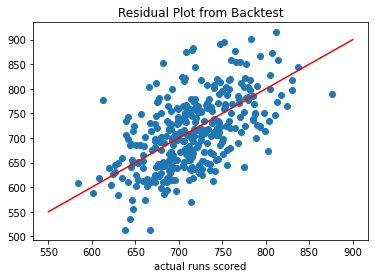

In [11]:
#pulling 10 years of team data
year = 2009

hitting_test = hitting.copy()
while year < 2020:
    #defining model for testing
    mod = smf.ols(
    """
        R_next ~ wOBA
                + GBFB_RATIO 
                + BB_K_RATIO

    """,
    data=hitting[hitting['Season_current']<year]).fit()
    
    #applying model to all data
    pred = mod.predict(hitting_test)
    
    #only writing results to DF if its in current year
    try:
        hitting_test['backtest_pred'][hitting_test['Season_current'] == year] = pred
    except:
        hitting_test['backtest_pred'] = np.nan
        hitting_test['backtest_pred'][hitting_test['Season_current'] == year] = pred
    
    #writing output
    print(year)
    print('MPE=',np.mean((hitting_test['backtest_pred'] - hitting_test['R_next']) / hitting_test['R_next']))
    print('MAPE=',np.mean(abs(hitting_test['backtest_pred'] - hitting_test['R_next']) / hitting_test['R_next']))
    
    year = year+1
    
    
#backtested residual plot
plt.figure()
plt.scatter(x=hitting_test['backtest_pred']
            , y=hitting_test['R_next'])
plt.plot([550,900],[550,900], color='red')
plt.title('Residual Plot from Backtest')
plt.xlabel('predicted runs scored')
plt.xlabel('actual runs scored')
plt.show()